# Artificial Neural Network

# # Part 1 - Data Preprocessing

In [3]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Importing the dataset
dataset=pd.read_csv("Churn_Modelling.csv")

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:

x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [7]:
#Create dummy variables
geagraphy=pd.get_dummies(x["Geography"],drop_first=True)
gender=pd.get_dummies(x["Gender"],drop_first=True)

In [8]:
## Concatenate the Data Frames
x=pd.concat([x,geagraphy,gender],axis=1)

In [9]:
## Drop Unnecessary columns
x=x.drop(['Geography','Gender'],axis=1)

In [10]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [15]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Now let's make the ANN!# 

In [32]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [31]:
# Initialising the ANN
classifier = Sequential()

In [30]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units= 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

In [19]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer= 'he_uniform',activation='relu'))

In [20]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [33]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

c:\users\ashish\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  
W0822 10:38:42.422649  4276 deprecation_wrapper.py:119] From c:\users\ashish\appdata\local\programs\python\python35\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 2s 292us/step - loss: 0.5110 - acc: 0.7962 - val_loss: 0.4863 - val_acc: 0.7955
Epoch 2/100
5359/5359 [==============================] - 1s 187us/step - loss: 0.4772 - acc: 0.7962 - val_loss: 0.4652 - val_acc: 0.7955
Epoch 3/100
5359/5359 [==============================] - 1s 190us/step - loss: 0.4593 - acc: 0.7962 - val_loss: 0.4533 - val_acc: 0.7955
Epoch 4/100
5359/5359 [==============================] - 1s 199us/step - loss: 0.4479 - acc: 0.7962 - val_loss: 0.4458 - val_acc: 0.7955
Epoch 5/100
5359/5359 [==============================] - 1s 203us/step - loss: 0.4399 - acc: 0.7962 - val_loss: 0.4411 - val_acc: 0.7955
Epoch 6/100
5359/5359 [==============================] - 1s 188us/step - loss: 0.4347 - acc: 0.7962 - val_loss: 0.4375 - val_acc: 0.7952
Epoch 7/100
5359/5359 [==============================] - 1s 190us/step - loss: 0.4308 - acc: 0.7972 - val_loss: 0.4345 - val_acc: 

5359/5359 [==============================] - 1s 187us/step - loss: 0.3468 - acc: 0.8584 - val_loss: 0.3658 - val_acc: 0.8520
Epoch 61/100
5359/5359 [==============================] - 1s 245us/step - loss: 0.3458 - acc: 0.8597 - val_loss: 0.3673 - val_acc: 0.8489
Epoch 62/100
5359/5359 [==============================] - 1s 257us/step - loss: 0.3451 - acc: 0.8580 - val_loss: 0.3652 - val_acc: 0.8535
Epoch 63/100
5359/5359 [==============================] - 1s 175us/step - loss: 0.3446 - acc: 0.8612 - val_loss: 0.3645 - val_acc: 0.8538
Epoch 64/100
5359/5359 [==============================] - 1s 202us/step - loss: 0.3443 - acc: 0.8602 - val_loss: 0.3635 - val_acc: 0.8546
Epoch 65/100
5359/5359 [==============================] - 1s 228us/step - loss: 0.3434 - acc: 0.8587 - val_loss: 0.3645 - val_acc: 0.8520
Epoch 66/100
5359/5359 [==============================] - 1s 272us/step - loss: 0.3428 - acc: 0.8608 - val_loss: 0.3632 - val_acc: 0.8573
Epoch 67/100
5359/5359 [=======================

dict_keys(['acc', 'val_loss', 'val_acc', 'loss'])


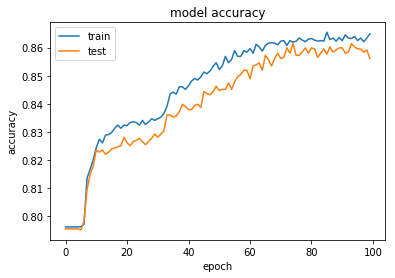

In [23]:

# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


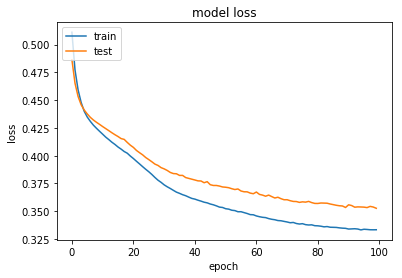

In [24]:

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model
# 

In [25]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1515,   80],
       [ 201,  204]], dtype=int64)

In [27]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [28]:
score

0.8595

## Perform Hyperparameter Optimization# 

In [34]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid

In [35]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)


In [ ]:

layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)

grid_result = grid.fit(X_train, y_train)

[grid_result.best_score_,grid_result.best_params_]
